# Sentiment Analysis

You can directly go to the main part of my challenge:
[main](#main)

Sentiment analysis is basically the process of determining the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral.

<center> <img src="src/0.gif" alt="Alt" title="Sentiment Analysis" /> </center>

[source](https://dribbble.com/shots/4226968-Sentiment-Analysis/attachments/4226968-Sentiment-Analysis?mode=media)

#### Common pipeline of Machine learning is following:
* ##### Problem statement
* ##### Acquisition
* ##### Preprocessing
* ##### Feature extraction
* ##### Modelling
* ##### Evaluation
* ##### Application

I want to solve this challenge using </br>

&#9658;
Machine-learning problems are very similar to our real life. We learn many things by guessing and making mistakes. </br>

&#9658;
Remind the first time you want to drive the car. At that time you couldn't have an understanding of the relation between gas and acceleration. You gave probably got much error and then using supervisor and training tried to reduce error cost. [_Supervised Learning_] </br>

&#9658;
Sometimes we prefer to learn something by test and trial, like the American education system. Students learn by experiences. [_Unsupervised Learning_] </br>

&#9658;
We use learning methods base on case and application. But the very important point is that you should be trained under a supervisor. Because the _cost_ is high! </br>

&#9658;
One part of Supervised learning is "_testing_". It is important to note that the teacher should always test the students as the family takes tests to protect the children evaluate if they are in the right direction. [_Evaluation_] </br>

&#9658;
Our Learning is base on a defined model. In our driving example, we have a driving licensing law (model) and we treat base on this law. And we apply it to our brain. </br>

In the machine learning world, for unsupervised learning algorithms like _KNN_, _Association Rules_. For supervised learning _Naive based_, _Decision Tree_, _SVM_. We use supervised learning if we have the label in advance. (like our challenge) </br>

In supervised learning, it's essential to select a suitable feature, in order to give a good result. </br>


* * *


##### In this Challeng , We want to:
> **Task:** Classify the sentiment in Twitter messages according to a 5-point ordinal scale.
> <br>**Input:** 10,000 Twitter messages together with topic and a label from a five point scale
(-2 ~ 2)
> <br>**Objective:** Train and evaluate a classifier


We have pretrained text file with 10,000 twieet with lable and topics. similar to "Subtask C" on [SemEval-2017]

***

But before jumping to objective. Lets a lit discover the data:

In [3]:
#Import the movie reviews corpus
import numpy as np
import pandas as pd

In [21]:
#Import the movie reviews corpus  #Read the base file into a raw text variable
col_names = ['Number', 'Singer', 'Polarity','Comment']
ds = pd.read_csv("SemEval2017.txt", names=col_names, delimiter="\t")

In [ ]:
#remove unnecessery column
ds = ds.drop(['Number'], axis=1)

ds.head(5)

One of thousend soluton for analysing comment is TextBlob Library

>__TextBlob__ is a Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.
[source](https://textblob.readthedocs.io/en/dev/#:~:text=TextBlob%20is%20a%20Python%20(2,classification%2C%20translation%2C%20and%20more.)


<center> <img src="src/1.gif" alt="Alt" title="Sentiment Analysis" style="width: 250px;"/> </center>

[source](https://medium.com/analytics-vidhya/sentiment-analysis-on-ellens-degeneres-tweets-using-textblob-ff525ea7c30f)

each word has different meaning weight:

<center> <img src="src/4.png" alt="Alt" title="From: yougov.com" style= "width: 400px;"/> </center>

for example:

|Sample  |Polarity |Subjectivity |
|:-----|:----:|----:|
|great     |0.8     |0.75    |
|not great     |-0.4     |0.75    |
|very great     |1.0     |0.975    |
|not very great     |-0.3     |0.57    |
|not great     |-0.4     |0.75    |
|not a very great     |<font color=red>-0.3</font>     |<font color=green>0.57</font>    |
|not a very great calculation     |<font color=red>-0.3</font>     |<font color=green>0.57</font>    |

Textblob provides in-build classifiers module to create a custom classifier. Like: </br>
```python
from textblob import classifiers
classifier = classifiers.NaiveBayesClassifier(training)
dt_classifier = classifiers.DecisionTreeClassifier(training)
````

In [ ]:
#install textblob
from textblob import TextBlob

print('{:10} : {:10} : {:100}'.format("Polarity", "Subjectivity", "Review") )

for review in ds.iloc[:,2]:
    #Find sentiment of a review
    sentiment = TextBlob(review)
    #Print individual sentiments
    print('{: 01.2f}    :   {:01.2f}   :   {:100}'.format(sentiment.polarity, sentiment.subjectivity, review))

In [ ]:
## Visualization
# from pivottablejs import pivot_ui
# pivot_ui(ds[:][0:1000])

##### the output should be so:
<img src="src/pre.png">

In [23]:
#Categorize Polarity into Positive, Neutral or Negative
labels = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]

#Initialize count array
values = [0, 0, 0, 0, 0]

#Categorize each review
for review in ds.iloc[:,2]:
    sentiment = TextBlob (review)
    
    #Custom formula to convert polarity    # 0=(Negative) 1=(Neutral) 2=(Positive)
    polarity = round(( sentiment.polarity + 1 ) * 5 ) % 5
    
    #add the summary array
    values[polarity] = values[polarity] + 1
    
print("Final summarized counts :", values)

Final summarized counts : [6394, 1981, 1131, 1271, 1233]



 Pie Representation 
 -------------------


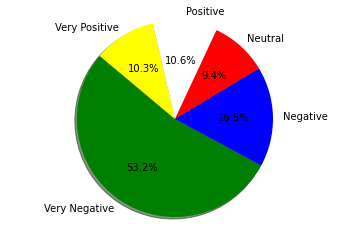

In [26]:
import matplotlib.pyplot as plt

#Set colors by label
color = ["Green", "Blue", "Red", "white", "yellow"]

print("\n Pie Representation \n -------------------")

# Plot a pie chart
plt.pie (values, labels = labels, colors = color, \
        autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.show()

But, this is not we want!
<br> Now we want to claaisfy it:

***

Another Solution:

This Graphic shows whole workflow and explain how does Sentiment Analysis work:
<center> <img src="src/3.png" alt="Alt" title="from: MonkeyLearn" style= "width: 500px;"/> </center>
<a id='main'></a>

In [1]:
# import library
## Standard libs
import pandas as pd
import os
import numpy as np
import random
import json
## DataPrep
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import plot_confusion_matrix
## Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

One of the problems with Tweeter is  noise (like Hashtag, User, Punctuation, URL and ...) . First, we have to remove them.

<center> <img src="src/2.png"> </center>

In [ ]:
# Start pre-Process dataset
def CleanText(text):
    text = re.sub(r"[^A-Za-z0-9(),!?\'`]", " ", text)
    text = re.sub(r"\'s", " \'s", text)
    text = re.sub(r"\'ve", " \'ve", text)
    text = re.sub(r"n\'t", " n\'t", text)
    text = re.sub(r"\'re", " \'re", text)
    text = re.sub(r"\'d", " \'d", text)
    text = re.sub(r"\'ll", " \'ll", text)
    text = re.sub(r",", " , ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\(", " \( ", text)
    text = re.sub(r"\)", " \) ", text)
    text = re.sub(r"\?", " \? ", text)
    text = re.sub(r"\s{2,}", " ", text)
    return text.strip().lower()

In [ ]:
# Reading the Data & Keeping only the neccessary columns
with open('SemEval2017.txt', encoding="utf8") as f:
    data = list(map(lambda x: reversed(x.strip().split('\t')[2:]), f.readlines()))

data = pd.DataFrame(data, columns = ['text', 'label'])
data['label'] = data['label'].apply(lambda x: int(x))
data['text'] = data['text'].apply(lambda x: CleanText(x))

data = data.sample(frac=1).reset_index()
data.index = list(range(data.shape[0]))

In [ ]:
# Tokenize Text
all_words = []
for ind, row in data.iterrows():
    tokenized = row['text'].split(' ')
    for word in tokenized:
        if word not in all_words:
            all_words.append(word) 
        else:
            pass

# convert word 2 vector and save to dictionary
word_dict = {}
for i, word in enumerate(all_words):
    word_dict[word] = i
with open('word_num.json', 'w', encoding="utf-8") as json_file:   #save to json file
    json.dump(word_dict, json_file, ensure_ascii=False, indent=4)

In [ ]:
# read words
all_words = json.load(open('word_num.json', 'r', encoding='utf-8'))

# Splitting the data into train and test
val_data = data.loc[list(range(int(data.shape[0] // 5))), ['text', 'label']].reset_index()
train_data = data.loc[list(range(int(data.shape[0] // 5), data.shape[0])), ['text', 'label']].reset_index()

In [ ]:
X_train = []
X_val = []

y_train = []
y_val = []

# Vectorize, to be understandable for computer
for ind, row in train_data.iterrows():
    helper = [0] * len(all_words)
    tok = row['text'].split(' ')
    for tk in tok:
        helper[all_words[tk]] = 1

    X_train.append(helper)
    y_train.append(row['label'])

for ind, row in val_data.iterrows():
    helper = [0] * len(all_words)
    tok = row['text'].split(' ')
    for tk in tok:
        helper[all_words[tk]] = 1

    X_val.append(helper)
    y_val.append(row['label'])

X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

In [ ]:
IMPS = []

train = pd.DataFrame(X_train, columns=[str(i) for i in range(np.shape(X_train)[1])])
train['label'] = y_train

transformed_data = pd.DataFrame(MultiLabelBinarizer().fit_transform(np.reshape(y_train,(-1,1))),\
                                columns = ['0','1','2','3','4'])

In [ ]:
# Extracting word features
for i in range(5):   
    importants = train.drop('label', axis=1).apply(lambda x: x.corr(transformed_data.iloc[:,i]))
    important_indices = list(np.where(abs(importants)>0.03)[0])
    IMPS += important_indices
important_indices = list(np.unique(IMPS))
X_train = X_train[:, important_indices]
X_val = X_val[:, important_indices]

In [ ]:
# Fitting a Logistic Regression classifier to the training data, evaluate & confusion Matrix
lrclf = LogisticRegression(C=.5, penalty='l2', solver='liblinear', max_iter=10000, class_weight='balanced')
lrclf.fit(X_train, y_train)

print(f'validatin acc: {round(lrclf.score(X_val, y_val)*100, 3)}%')
plot_confusion_matrix(lrclf, X_val, y_val)

In [ ]:
# Training the Naive Bayes classifier, evaluate & confusion Matrix
nbclf = MultinomialNB()
nbclf.fit(X_train, y_train)

print(f'validatin acc: {round(nbclf.score(X_val, y_val)*100, 3)}%')
plot_confusion_matrix(nbclf, X_val, y_val)

In [ ]:
# Train Stochastic Gradient Descent classifier, evaluate & confusion Matrix
sgdclf = SGDClassifier(max_iter=5000, tol=1e-3, class_weight='balanced')
sgdclf.fit(X_train, y_train)

print(f'validatin acc: {round(sgdclf.score(X_val, y_val)*100, 3)}%')
plot_confusion_matrix(sgdclf, X_val, y_val)

Comparing accuracy of 3 algorithms:

|  |LogisticRegression|Naïve Bayes|Stochastic GD|
|:-----|:----:|----:|----:|
|Accuracy     |58.4%     |58.9%    |55.9%    |


😑 It's not good. That means we have to make a better feature ...